In [2]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

# Setup feedback system
from learntools.core import binder
binder.bind(globals())
print('Setup complete')

Setup complete


/tmp/ipykernel_33/3206524422.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [5]:
import pandas as pd

cereal = pd.read_csv('/kaggle/input/80-cereals/cereal.csv')
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [6]:
# (rows, columns)
cereal.shape

(77, 16)

**Define a linear model accepting three input features ('protein', 'sodium', 'sugars') and producing a single output ('calories')**

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
w, b = model.weights
print("Weights\n{}\n\nBias\n{}".format(w, b))

Weights
<KerasVariable shape=(3, 1), dtype=float32, path=sequential/dense/kernel>

Bias
<KerasVariable shape=(1,), dtype=float32, path=sequential/dense/bias>


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


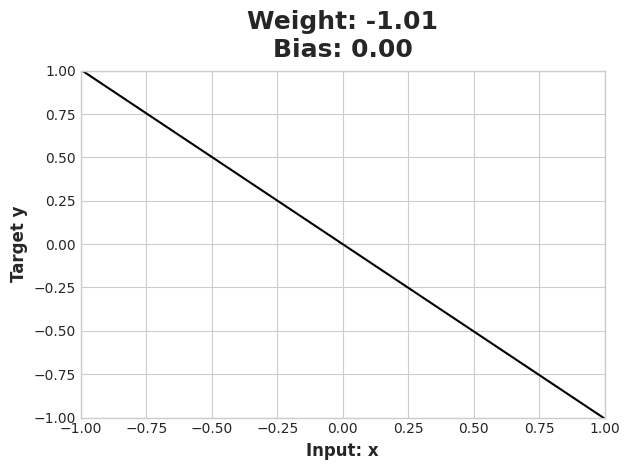

In [11]:
import tensorflow as tf

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")

plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()